# Дипломная работа Гикашвили И.Г.

In [1]:
import pandas as pd
import seaborn as sns

In [6]:
#1.Загрузите файл
data = pd.read_csv('Hr.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [38]:
data['average_montly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [7]:
#2.Рассчитайте основные статистики для переменных

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


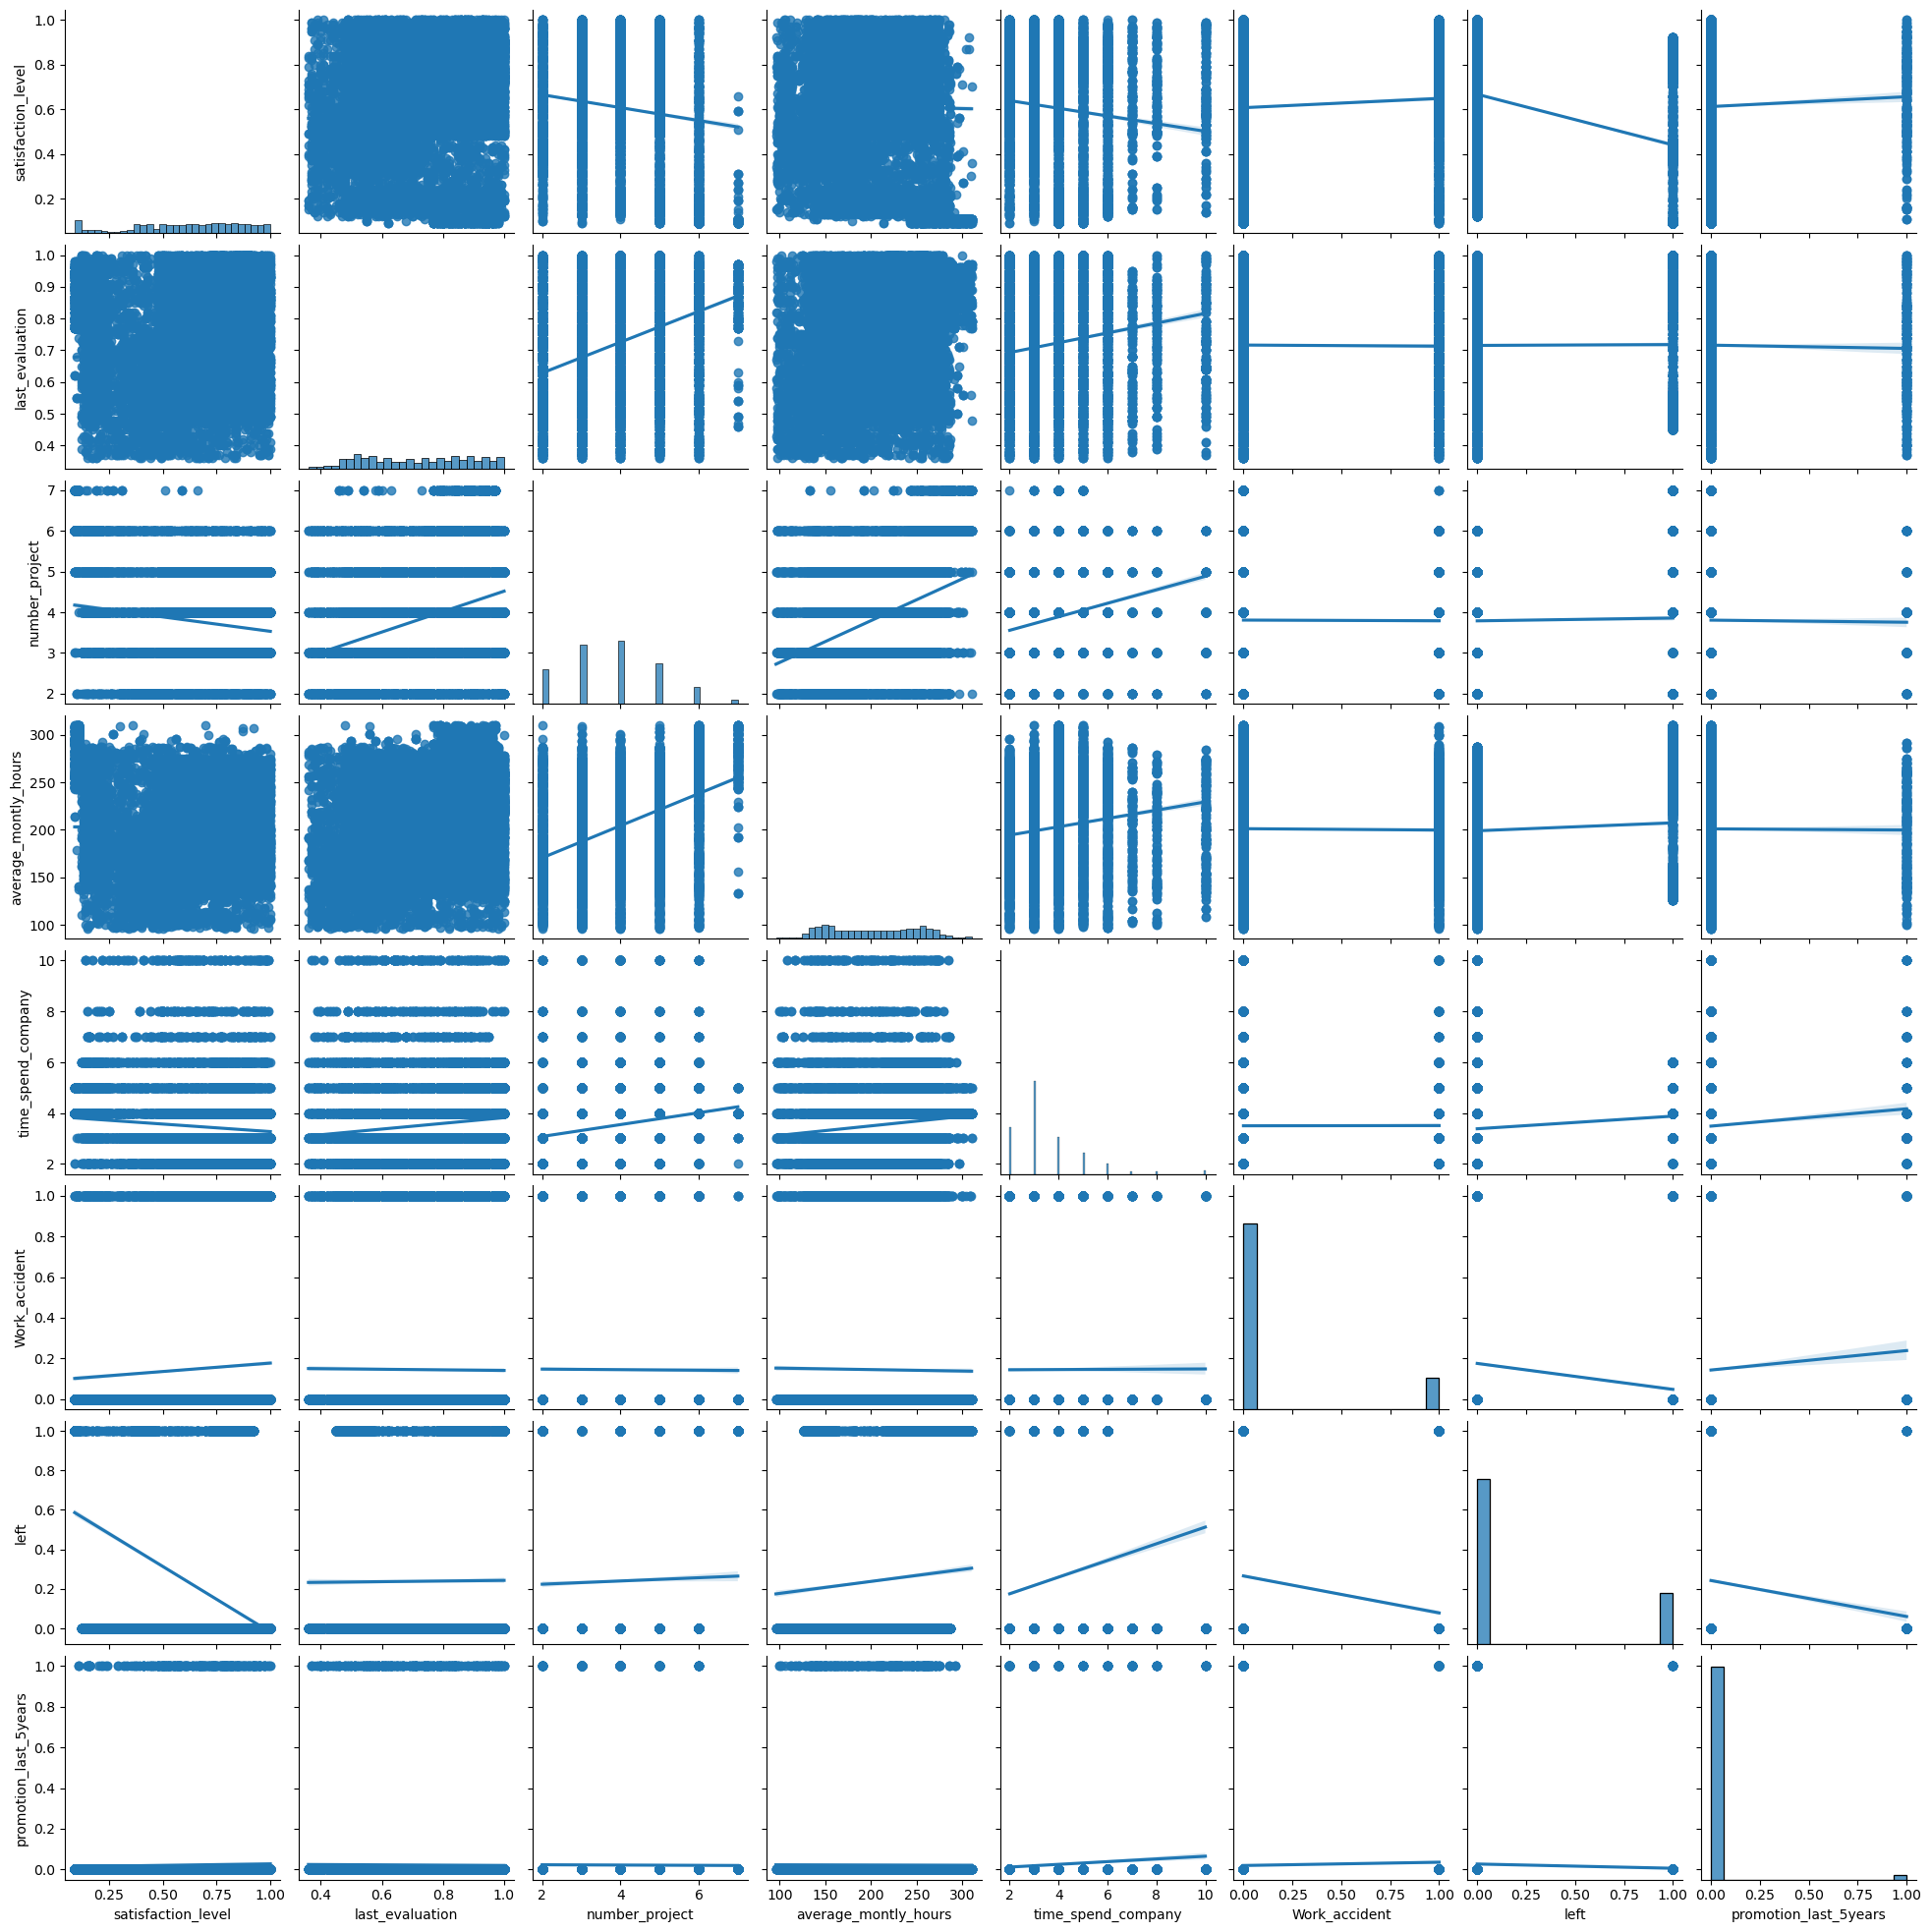

In [8]:
# 3.Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее
# скоррелированные переменные.

sns.pairplot(data, kind='reg')

In [76]:
#Расчет корреляции и вывод масимальных и минимальных 
corr_table = data.corr()
corr_table['1_index'] = corr_table.index #Доп обработка 
corr_table = corr_table.melt(id_vars=['1_index'], 
        var_name='2_index', 
        value_name='Value') #Переводим все данные в один столбец дял подсчета минимальног ои максимального
corr_table = corr_table[corr_table['Value'] !=1] #Убираем случае где переменыне пересикались
max_cor = corr_table[corr_table['Value'] == max(corr_table['Value'], key=abs)].head(1) 
#Считаем самые далекие от 0 - самые скоррелированные
min_cor = corr_table[corr_table['Value'] == min(corr_table['Value'], key=abs)].head(1)
#Считаем самые близкие к 0 - наименее скоррелированные
print(f" Самые скоррелированные переменные {max_cor['1_index'].iloc[0]} и {max_cor['2_index'].iloc[0]}")
print(f" Наименее скоррелированные переменные {min_cor['1_index'].iloc[0]} и {min_cor['2_index'].iloc[0]}")

 Самые скоррелированные переменные average_montly_hours и number_project
 Наименее скоррелированные переменные Work_accident и time_spend_company


In [77]:
#4.Рассчитайте сколько сотрудников работает в каждом департаменте.

#Для расчета исключаем уволившихся
data[data.left != 1].groupby('department').count()['left'].sort_values()

department
hr              524
management      539
accounting      563
marketing       655
RandD           666
product_mng     704
IT              954
support        1674
technical      2023
sales          3126
Name: left, dtype: int64

In [78]:
#5.Показать распределение сотрудников по зарплатам.

#Для расчета исключаем уволившихся
data[data.left != 1].groupby('salary').count()['left'].sort_index()

salary
high      1155
low       5144
medium    5129
Name: left, dtype: int64

In [79]:
#6.Показать распределение сотрудников по зарплатам.

#Для расчета исключаем уволившихся
data[data.left != 1].groupby(['department', 'salary']).count()['left'].sort_index()

department   salary
IT           high        79
             low        437
             medium     438
RandD        high        47
             low        309
             medium     310
accounting   high        69
             low        259
             medium     235
hr           high        39
             low        243
             medium     242
management   high       224
             low        121
             medium     194
marketing    high        71
             low        276
             medium     308
product_mng  high        62
             low        346
             medium     296
sales        high       255
             low       1402
             medium    1469
support      high       133
             low        757
             medium     784
technical    high       176
             low        994
             medium     853
Name: left, dtype: int64

In [80]:
#7 Проверить гипотезу, что сотрудники с высоким окладом 
#проводят на работе больше времени, чем сотрудники с низким
#окладом

#Для расчета исключаем уволившихся

high_av_hours = data[(data.left != 1) & (data.salary == 'high')].average_montly_hours.median()
low_av_hours = data[(data.left != 1) & (data.salary == 'low')].average_montly_hours.median()
diff_hours = high_av_hours - low_av_hours

if diff_hours > 0:
    print(f'Сотрудники с высоким окдаом в среднем в месяц работают на {round(diff_hours, 2)} часа больше')
else:
    print(f'Сотрудники с низким окдаом в среднем в месяц работают на {round(-diff_hours, 2)} часа больше')
    
#Было взято медианное значение для большей точности.
#В срденем сотруднкии с высоким окладом работаю больше, но в рамках месяца получается всего 4 часа,
#что не позвояет судить со 100% вероятностью, что именно оклад является показателем для времени на работе

Сотрудники с высоким окдаом в среднем в месяц работают на 4.0 часа больше


In [81]:
#8. Рассчитать следующие показатели среди уволившихся и не
# уволившихся сотрудников (по отдельности):
#     ● Доля сотрудников с повышением за последние 5 лет
#     ● Средняя степень удовлетворенности
#     ● Среднее количество проектов

#Строим сводную таблицу
table_pivot = data.pivot_table(index = 'left', values = ['promotion_last_5years', \
                                                         'number_project',\
                                                         'satisfaction_level'], \
                               aggfunc = 'mean')
#Преобразовываем признак повышения в %
table_pivot['promotion_last_5years'] = round(table_pivot['promotion_last_5years']*100,2).astype(str) + '%'
table_pivot = table_pivot[['promotion_last_5years', 'satisfaction_level', 'number_project']]
table_pivot.rename(columns={'promotion_last_5years': 'Доля повышений за последение 5 лет', \
                            'satisfaction_level': 'Средняя удовлетворенность',\
                            'number_project': 'Среднее кол-во проектов'}, inplace=True)
table_pivot

,Доля повышений за последение 5 лет,Средняя удовлетворенность,Среднее кол-во проектов
left,,,
0,2.63%,0.666810,3.786664
1,0.53%,0.440098,3.855503
